In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Importing midi as a Data frame

In [112]:
df_m = pd.read_csv('extracted_feature_values_midi.csv')
cluster_mood_filename = df_m.cluster_mood_filename
temp = []
cluster = []
mood = []
filename = []

for i in cluster_mood_filename:
    temp.append(i)
temp = [i.split('\\') for i in temp]

for path in temp:
    cluster.append(path[-3])
    mood.append(path[-2])
    filename.append(path[-1].split('.')[0])

df_m['cluster'] = cluster
df_m['mood'] = mood
df_m['filename'] = filename

cols_m = [col for col in df_m.columns]
xcols_m = cols_m[1:-3]
ycol_m = cols_m[-3]

le = preprocessing.LabelEncoder()
X_m = df_m[xcols_m]
X_m = X_m.fillna(0)
Y_m = df_m[ycol_m]
Y_m = pd.DataFrame(Y_m)
Y_m = Y_m.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
df_m['cluster'] = Y_m

df_m.drop('cluster_mood_filename', axis=1, inplace=True)
df_m.drop('mood', axis=1, inplace=True)

df_m.head()
#X_m.isnull().values.any()

Basic_Pitch_Histogram_0  Basic_Pitch_Histogram_1  Basic_Pitch_Histogram_2  \
0                      0.0                        0                        0   
1                      0.0                        0                        0   
2                      0.0                        0                        0   
3                      0.0                        0                        0   
4                      0.0                        0                        0   

   Basic_Pitch_Histogram_3  Basic_Pitch_Histogram_4  Basic_Pitch_Histogram_5  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   Basic_Pitch_Histogram_6  Basic_Pitch_Histogram_7  Basic_Pitch_Histogram_8  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   Basic_Pitch_Histogram_9  ...  Contrary_Motion  Oblique_Motion  \
0                        0  ...          0.08368          0.4221   
1                        0  ...          0.00000          0.7668   
2                        0  ...          0.40000          0.4000   
3                        0  ...          0.07591          0.6920   
4                        0  ...          0.05166          0.6745   

   Parallel_Fifths  Parallel_Octaves  Dynamic_Range  Variation_of_Dynamics  \
0         0.015850          0.102600            103                 17.130   
1         0.014930          0.014930             63                 28.720   
2         0.000000          0.000000            187                 30.710   
3         0.000627          0.005646             74                 21.880   
4         0.001722          0.045920            100                  4.128   

   Variation_of_Dynamics_In_Each_Voice  \
0                               6.4460   
1                               0.8242   
2                              23.5100   
3                               6.2670   
4                               1.4070   

   Average_Note_to_Note_Change_in_Dynamics  cluster  filename  
0                                  5.39500        0       004  
1                                  0.08103        0       008  
2                                 11.99000        0       009  
3                                  5.43600        0       012  
4                                  0.05678        0       019  

[5 rows x 1497 columns]

# Importing Lyrics as a Dataframe

In [114]:
# this text preprocessor function was originally written by Mauro Di Pietro
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    # clean (convert to lowercase and remove punctuations and   
    # characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

df_l = pd.read_csv("lyric_bag.csv")
lst_stopwords = nltk.corpus.stopwords.words("english")

df_l["text_clean"] = df_l["text"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))

filenames = df_l['filename']
filenumber = []

for file in filenames:
    temp = file.split('.')
    filenumber.append(temp[0])
df_l['filename'] = filenumber

le = preprocessing.LabelEncoder()
X_l = df_l['text_clean']
Y_l = df_l['cluster']
Y_l = pd.DataFrame(Y_l)
# X = pd.DataFrame(X)
Y_l = Y_l.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
df_l['cluster'] = Y_l

df_l.drop('text', axis=1, inplace=True)
df_l.drop('mood_file', axis=1, inplace=True)
df_l.drop('mood', axis=1, inplace=True)
#df_l.drop('cluster', axis=1, inplace=True)

df_l.head()

filename  cluster                                         text_clean
0      001        0  mama treat daughter mean mama treat daughter m...
1      003        0  plopped easy chair turned channel 2 bad gunsli...
2      004        0  back black hit sack long im glad back yes im l...
3      007        0  woo gave money gave time wanna hurt girl serio...
4      008        0  imagination finally found something worth livi...

# Importing audio as a Dataframe

In [115]:
df_a = pd.read_csv('audiofeaturestransformed.csv')
cluster_mood_filename = df_a.cluster_mood_filename
temp = []
cluster = []
mood = []
filename = []

for i in cluster_mood_filename:
    temp.append(i)
temp = [i.split('\\') for i in temp]

for path in temp:
    cluster.append(path[-3])
    mood.append(path[-2])
    filename.append(path[-1].split('.')[0])

df_a['cluster'] = cluster
df_a['mood'] = mood
df_a['filename'] = filename

cols_a = [col for col in df_a.columns]
xcols_a = cols_a[1:-3]
ycol_a = cols_a[-3]

le = preprocessing.LabelEncoder()
X_a = df_a[xcols_a]
#X_a = X_a.fillna(0)
Y_a = df_a[ycol_a]
Y_a = pd.DataFrame(Y_a)
Y_a = Y_a.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
df_a['cluster'] = Y_a

df_a.drop('cluster_mood_filename', axis=1, inplace=True)
df_a.drop('mood', axis=1, inplace=True)
#df_a.drop('cluster', axis=1, inplace=True)

df_a.head()
#df_a.isnull().values.any()

Spectral Centroid Overall Standard Deviation  \
0                                          21.4   
1                                          11.9   
2                                          14.6   
3                                          19.2   
4                                          11.5   

   Spectral Rolloff Point Overall Standard Deviation  \
0                                             0.1880   
1                                             0.0867   
2                                             0.1270   
3                                             0.1080   
4                                             0.1230   

   Spectral Flux Overall Standard Deviation  \
0                                  0.003420   
1                                  0.000855   
2                                  0.002610   
3                                  0.004220   
4                                  0.002220   

   Compactness Overall Standard Deviation  \
0                                   170.0   
1                                   165.0   
2                                   173.0   
3                                   157.0   
4                                   179.0   

   Spectral Variability Overall Standard Deviation  \
0                                          0.00205   
1                                          0.00115   
2                                          0.00173   
3                                          0.00179   
4                                          0.00129   

   Root Mean Square Overall Standard Deviation  \
0                                       0.0807   
1                                       0.0424   
2                                       0.0676   
3                                       0.0712   
4                                       0.0481   

   Fraction Of Low Energy Windows Overall Standard Deviation  \
0                                             0.0511           
1                                             0.0262           
2                                             0.0606           
3                                             0.0477           
4                                             0.0493           

   Zero Crossings Overall Standard Deviation  \
0                                       44.0   
1                                       22.7   
2                                       31.2   
3                                       33.3   
4                                       26.2   

   Strongest Beat Overall Standard Deviation  \
0                                      38.00   
1                                      10.20   
2                                      28.30   
3                                       3.99   
4                                       4.84   

   Beat Sum Overall Standard Deviation  ...  \
0                                 44.4  ...   
1                                 29.8  ...   
2                                 98.4  ...   
3                                150.0  ...   
4                                 30.2  ...   

   Area Method of Moments Overall Average2  \
0                                3360000.0   
1                                3410000.0   
2                                3450000.0   
3                                3500000.0   
4                                3560000.0   

   Area Method of Moments Overall Average3  \
0                            -6.590000e+10   
1                            -6.800000e+10   
2                            -7.020000e+10   
3                            -7.240000e+10   
4                            -7.460000e+10   

   Area Method of Moments Overall Average4  \
0                            -8.620000e+11   
1                            -8.880000e+11   
2                            -9.130000e+11   
3                            -9.430000e+11   
4                            -9.730000e+11   

   Area Method of Moments Overall Average5  \
0                            -1.130000e+13   
1         

# Initial midi Experiment - Full Dataset

### Normalize and split dataset into train-test

In [34]:
#Normalizing using minmaxscalor scalor 
normalized_X_m = X_m.values
minmaxscaler =  preprocessing.MinMaxScaler()
X_scaled = minmaxscaler.fit_transform(normalized_X_m)
normalized_X_m = pd.DataFrame(X_scaled, columns=xcols_m)
Xm_train,Xm_test,Ym_train,Ym_test = train_test_split(normalized_X_m, Y_m, test_size=0.3, stratify=Y_m)
# Ym_train['cluster'].value_counts()
#print(type(Xm_train),type(Xm_test))

### Baseline performance without feature selection

In [35]:
%%time
param = {'C': [0.001,0.01,0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_bm = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_bm.fit(Xm_train, Ym_train.values.ravel())

train_accuracy_base_midi = grid_bm.best_score_

grid_predict_bm = grid_bm.predict(Xm_test)
test_accuracy_base_midi =  metrics.accuracy_score(Ym_test,grid_predict_bm)

print("Training accuracy " + str(train_accuracy_base_midi))
print("Test accuracy " + str(test_accuracy_base_midi))
print(grid_bm.best_params_)
print(metrics.classification_report(Ym_test, grid_predict_bm))

Fitting 200 folds for each of 7 candidates, totalling 1400 fits
Training accuracy 0.36777472527472527
Test accuracy 0.3220338983050847
{'C': 0.01, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.32      0.57      0.41        14
           1       0.40      0.14      0.21        14
           2       0.31      0.64      0.42        14
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         7

    accuracy                           0.32        59
   macro avg       0.21      0.27      0.21        59
weighted avg       0.24      0.32      0.25        59

Wall time: 8.98 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Tree Based Feature Selection on Midi

In [36]:
%%time
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(Xm_train, Ym_train.values.ravel())
model = SelectFromModel(rf_clf, prefit=True)

rf_Xm_train = Xm_train.loc[:, model.get_support()]
rf_Xm_test = Xm_test.loc[:, model.get_support()]
print(rf_Xm_train.shape, rf_Xm_test.shape)

param = {'C': [0.001,0.01,0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_tb = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_tb.fit(rf_Xm_train, Ym_train.values.ravel())

train_accuracy_tb_midi = grid_tb.best_score_

grid_predict_tb = grid_tb.predict(rf_Xm_test)
test_accuracy_tb_midi =  metrics.accuracy_score(Ym_test,grid_predict_tb)

print("Training accuracy " + str(train_accuracy_tb_midi))
print("Test accuracy " + str(test_accuracy_tb_midi))
print(grid_tb.best_params_)
print(metrics.classification_report(Ym_test, grid_predict_tb))

(137, 518) (59, 518)
Fitting 200 folds for each of 7 candidates, totalling 1400 fits
Training accuracy 0.4484615384615384
Test accuracy 0.4067796610169492
{'C': 0.1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.38      0.43      0.40        14
           1       0.38      0.43      0.40        14
           2       0.42      0.57      0.48        14
           3       0.33      0.10      0.15        10
           4       0.60      0.43      0.50         7

    accuracy                           0.41        59
   macro avg       0.42      0.39      0.39        59
weighted avg       0.41      0.41      0.39        59

Wall time: 2.95 s


### Recursive Feature Elimination on midi

In [37]:
%%time
clf = svm.SVC(C=0.1, kernel='linear')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

rfecv = RFECV(estimator = clf, step = 1, cv = cv, scoring='accuracy', n_jobs=15, min_features_to_select = 10 )
rfetrain = rfecv.fit(Xm_train, Ym_train.values.ravel())
print('Optimal number of features :', rfecv.n_features_)

rfem = RFE(estimator=clf, n_features_to_select=rfecv.n_features_, step=1)
rfem = rfem.fit(Xm_train, Ym_train.values.ravel())

rfe_Xm_train = Xm_train.loc[:, rfem.get_support()]
rfe_Xm_test = Xm_test.loc[:, rfem.get_support()]

param = {'C': [0.001,0.01,0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_rfe = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_rfe.fit(rfe_Xm_train, Ym_train.values.ravel())

train_accuracy_rfe_midi = grid_rfe.best_score_

grid_predict_rfe = grid_rfe.predict(rfe_Xm_test)
test_accuracy_rfe_midi =  metrics.accuracy_score(Ym_test,grid_predict_rfe)

print("Training accuracy " + str(train_accuracy_rfe_midi))
print("Test accuracy " + str(test_accuracy_rfe_midi))
print(grid_rfe.best_params_)
print(metrics.classification_report(Ym_test, grid_predict_rfe))

for index, rank in enumerate(rfem.ranking_):
    if rank in [1]:
        print("Rank " + str(rank)+ " feature: " + xcols_m[index])

Optimal number of features : 15
Fitting 200 folds for each of 7 candidates, totalling 1400 fits
Training accuracy 0.48115384615384615
Test accuracy 0.3389830508474576
{'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.55      0.43      0.48        14
           1       0.22      0.29      0.25        14
           2       0.32      0.43      0.36        14
           3       0.33      0.10      0.15        10
           4       0.38      0.43      0.40         7

    accuracy                           0.34        59
   macro avg       0.36      0.33      0.33        59
weighted avg       0.36      0.34      0.33        59

Rank 1 feature: Importance_of_Middle_Register
Rank 1 feature: Vertical_Interval_Histogram_9
Rank 1 feature: Vertical_Minor_Third_Prevalence
Rank 1 feature: Median_Rhythmic_Value_Offset
Rank 1 feature: Mean_Tempo
Rank 1 feature: Amount_of_Staccato
Rank 1 feature: Number_of_Relatively_Strong_Rhythmic_Pulses
Rank 1 f

### Anova F-test

In [40]:
%%time
param = {'C': [0.001,0.01,0.1, 1, 10],
              'kernel': ['linear']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)
num_features = []
train_acc_F_measure = []
test_acc_F_measure = []
best_params = []

for count in range(1,1496):
    
    test = SelectKBest(score_func=f_classif, k = count)
    X_new_train = test.fit_transform(Xm_train,Ym_train.values.ravel())
    X_new_test = test.transform(Xm_test)
    
    grid_fm = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
    grid_fm.fit(X_new_train, Ym_train.values.ravel())
    
    train_accuracy_tempf = grid_fm.best_score_
    grid_predict_fm = grid_fm.predict(X_new_test)
    test_accuracy_tempf = metrics.accuracy_score(Ym_test,grid_predict_fm)
    
    num_features.append(count)
    train_acc_F_measure.append(train_accuracy_tempf)
    test_acc_F_measure.append(test_accuracy_tempf)
    best_params.append(grid_fm.best_params_)
    
    
best_train_f_midi = max(train_acc_F_measure)
nfeats_ftestmidi = num_features[train_acc_F_measure.index(best_train_f_midi)]
best_tacc_f_midi = test_acc_F_measure[train_acc_F_measure.index(best_train_f_midi)]
param = best_params[train_acc_F_measure.index(best_train_f_midi)]

print("Number of features: " + str(nfeats_ftestmidi))
print("Train Accuracy: " + str(best_train_f_midi))
print("Test Accuracy: " + str(best_tacc_f_midi)) 
print("Param: " + str(param))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   12   13   15   18
   20  108  109  111  113  114  116  117  118  119  120  121  122  123
  124  125  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  425  427
  428  430  431  432  433  434  435  436  437  438  439  440  441  442
  443  444  445  446  447  448  449  450  451  452  453  454  455  456
  457  458  459  460  461  462  463  464  465  466  467  468  469  529
  982  993 1018 1019 1044 1046 1050 1051 1057 1060 1063 1065 1066 1071
 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1133 1138 1141 1142
 1143 1157 1168 1193 1194 1219 1221 1225 1226 1232 1235 1238 1240 1241
 1246 1250 1251 1253 1256 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Number of features: 351
Train Accuracy: 0.5425
Test Accuracy: 0.3898305084745763
Param: {'C': 0.1, 'kernel': 'linear'}
Wall time: 54min 25s


### Chi-squared Test

In [41]:
%%time
param = {'C': [0.001,0.01,0.1, 1, 10],
              'kernel': ['linear']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)
num_features = []
train_acc_c_measure = []
test_acc_c_measure = []
best_params = []

for count in range(1,1496):
    
    test = SelectKBest(score_func=chi2, k = count)
    X_new_train = test.fit_transform(Xm_train,Ym_train.values.ravel())
    X_new_test = test.transform(Xm_test)
    
    grid_cm = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
    grid_cm.fit(X_new_train, Ym_train.values.ravel())
    
    train_accuracy_tempc = grid_cm.best_score_
    grid_predict_cm = grid_cm.predict(X_new_test)
    test_accuracy_tempc = metrics.accuracy_score(Ym_test,grid_predict_cm)
    
    num_features.append(count)
    train_acc_c_measure.append(train_accuracy_tempc)
    test_acc_c_measure.append(test_accuracy_tempc)
    best_params.append(grid_cm.best_params_)
    
best_train_c_midi = max(train_acc_c_measure)
nfeats_ctestmidi = num_features[train_acc_c_measure.index(best_train_c_midi)]
best_tacc_c_midi = test_acc_c_measure[train_acc_c_measure.index(best_train_c_midi)]
param = best_params[train_acc_c_measure.index(best_train_c_midi)]

print("Number of features: " + str(nfeats_ctestmidi))
print("Train Accuracy: " + str(best_train_c_midi))
print("Test Accuracy: " + str(best_tacc_c_midi))  
print("Param: " + str(param))

Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidat

Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidat

Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidat

Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidat

Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidat

Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidat

Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidat

Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidat

Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidat

Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidat

Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidat

Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Fitting 200 folds for each of 5 candidat

# Initial Lyrics Experiments - Full dataset

### Split dataset and vectorize

In [3]:
Xl_train, Xl_test, Yl_train, Yl_test = train_test_split(X_l, Y_l, test_size=0.3, stratify=Y_l)
vectorizer1 = TfidfVectorizer(ngram_range=(1,3))
vectorizer2 = CountVectorizer(ngram_range=(1,3))
Xl1_train = vectorizer1.fit_transform(Xl_train.values)
Xl1_test = vectorizer1.transform(Xl_test.values)
Xl2_train = vectorizer2.fit_transform(Xl_train.values)
Xl2_test = vectorizer2.transform(Xl_test.values)
print(Xl1_train.shape, Xl1_test.shape)
print(Xl2_train.shape, Xl2_test.shape)

(534, 95879) (230, 95879)
(534, 95879) (230, 95879)


### Baseline tfidf Performance

In [4]:
%%time
param = {'C': [1, 10, 100,1000],
              'kernel': ['linear']}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_bsl1 = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_bsl1.fit(Xl1_train, Yl_train.values.ravel())
train_accuracy_base1_slyrics = grid_bsl1.best_score_

grid_predict_bsl1 = grid_bsl1.predict(Xl1_test)
test_accuracy_base1_slyrics =  metrics.accuracy_score(Yl_test,grid_predict_bsl1)

print("Training accuracy " + str(train_accuracy_base1_slyrics))
print("Test accuracy " + str(test_accuracy_base1_slyrics))
print(grid_bsl1.best_params_)
print(metrics.classification_report(Yl_test, grid_predict_bsl1))

Fitting 200 folds for each of 4 candidates, totalling 800 fits
Training accuracy 0.3723707197763801
Test accuracy 0.39565217391304347
{'C': 10, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.42      0.27      0.33        41
           1       0.30      0.24      0.27        41
           2       0.42      0.72      0.54        58
           3       0.32      0.33      0.32        52
           4       0.58      0.29      0.39        38

    accuracy                           0.40       230
   macro avg       0.41      0.37      0.37       230
weighted avg       0.40      0.40      0.38       230

Wall time: 51.5 s


### Baseline count performance

In [5]:
%%time
param = {'C': [1, 10, 100,1000],
              'kernel': ['linear']}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_bsl2 = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_bsl2.fit(Xl2_train, Yl_train.values.ravel())
train_accuracy_base2_slyrics = grid_bsl2.best_score_

grid_predict_bsl2 = grid_bsl2.predict(Xl2_test)
test_accuracy_base2_slyrics =  metrics.accuracy_score(Yl_test,grid_predict_bsl2)

print("Training accuracy " + str(train_accuracy_base2_slyrics))
print("Test accuracy " + str(test_accuracy_base2_slyrics))
print(grid_bsl2.best_params_)
print(metrics.classification_report(Yl_test, grid_predict_bsl2))

Fitting 200 folds for each of 4 candidates, totalling 800 fits
Training accuracy 0.3683350803633823
Test accuracy 0.34782608695652173
{'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.35      0.22      0.27        41
           1       0.26      0.15      0.19        41
           2       0.39      0.74      0.51        58
           3       0.24      0.17      0.20        52
           4       0.38      0.34      0.36        38

    accuracy                           0.35       230
   macro avg       0.32      0.32      0.31       230
weighted avg       0.32      0.35      0.32       230

Wall time: 54 s


### Chi-squared test on tfidf

In [16]:
%%time
num_features = []
train_acc_cl1 = []
test_acc_cl1 = []
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

for count in range(100,95801,100):
    clf1 = svm.SVC(C=10, kernel='linear')
    test = SelectKBest(score_func=chi2, k = count)
    X_new_train = test.fit_transform(Xl1_train,Yl_train.values.ravel())
    X_new_test = test.transform(Xl1_test)
    
    clf1.fit(X_new_train, Yl_train.values.ravel())
    
    train_acc = cross_val_score(clf1, X_new_train, Yl_train.values.ravel(), cv=cv, n_jobs=15).mean()
    Yl_predict = clf1.predict(X_new_test)
    test_acc = metrics.accuracy_score(Yl_test,Yl_predict)
    
    num_features.append(count)
    train_acc_cl1.append(train_acc)
    test_acc_cl1.append(test_acc)
    
clf1 = svm.SVC(C=10, kernel='linear')
clf1.fit(Xl1_train, Yl_train.values.ravel())

train_acc = cross_val_score(clf1, Xl1_train, Yl_train.values.ravel(), cv=cv, n_jobs=15).mean()

Yl_predict = clf1.predict(Xl1_test)
test_acc = metrics.accuracy_score(Yl_test,Yl_predict)

num_features.append(95879)
train_acc_cl1.append(train_acc)
test_acc_cl1.append(test_acc)

Wall time: 1h 18min 17s


In [18]:
best_train_cl1 = max(train_acc_cl1)
nfeats = num_features[train_acc_cl1.index(best_train_cl1)]
best_tacc_cl1 = train_acc_cl1[train_acc_cl1.index(best_train_cl1)]

print("Number of features: " + str(nfeats))
print("Train Accuracy: " + str(best_train_cl1))
print("Test Accuracy: " + str(best_tacc_cl1))

Number of features: 55000
Train Accuracy: 0.4093046820405311
Test Accuracy: 0.4093046820405311


### Chi-squared test on count

In [19]:
%%time
num_features = []
train_acc_cl2 = []
test_acc_cl2 = []
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

for count in range(100,95801,100):
    clf2 = svm.SVC(C=1, kernel='linear')
    test = SelectKBest(score_func=chi2, k = count)
    X_new_train = test.fit_transform(Xl2_train,Yl_train.values.ravel())
    X_new_test = test.transform(Xl2_test)
    
    clf2.fit(X_new_train, Yl_train.values.ravel())
    
    train_acc = cross_val_score(clf2, X_new_train, Yl_train.values.ravel(), cv=cv, n_jobs=15).mean()
    Yl_predict = clf2.predict(X_new_test)
    test_acc = metrics.accuracy_score(Yl_test,Yl_predict)
    
    num_features.append(count)
    train_acc_cl2.append(train_acc)
    test_acc_cl2.append(test_acc)
    
clf2 = svm.SVC(C=1, kernel='linear')
clf2.fit(Xl2_train, Yl_train.values.ravel())

train_acc = cross_val_score(clf2, Xl2_train, Yl_train.values.ravel(), cv=cv, n_jobs=15).mean()

Yl_predict = clf2.predict(Xl1_test)
test_acc = metrics.accuracy_score(Yl_test,Yl_predict)

num_features.append(95879)
train_acc_cl2.append(train_acc)
test_acc_cl2.append(test_acc)

Wall time: 1h 22min 53s


In [21]:
best_train_cl2 = max(train_acc_cl2)
nfeats = num_features[train_acc_cl2.index(best_train_cl2)]
best_tacc_cl2 = train_acc_cl2[train_acc_cl2.index(best_train_cl2)]

print("Number of features: " + str(nfeats))
print("Train Accuracy: " + str(best_train_cl2))
print("Test Accuracy: " + str(best_tacc_cl2))

Number of features: 5300
Train Accuracy: 0.3993588399720476
Test Accuracy: 0.3993588399720476


# Initial Audio Experiments - Full Dataset

### Normalize and split dataset into train-test

In [55]:
#Normalizing using minmaxscalor scalor 
normalized_X_a = X_a.values
minmaxscaler =  preprocessing.MinMaxScaler()
X_scaled = minmaxscaler.fit_transform(normalized_X_a)
normalized_X_a = pd.DataFrame(X_scaled, columns=xcols_a)
Xa_train,Xa_test,Ya_train,Ya_test = train_test_split(normalized_X_a, Y_a, test_size=0.3, stratify=Y_a)
print(Ya_train['cluster'].value_counts())
print(type(Xa_train),type(Xa_test))

2    150
3    134
0    119
1    115
4    114
Name: cluster, dtype: int64
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


### Baseline audio performance without feature selection

In [56]:
%%time
param = {'C': [0.001,0.01,0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_ba = GridSearchCV(svm.SVC(probability=True), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_ba.fit(Xa_train, Ya_train.values.ravel())

train_accuracy_base_audio = grid_ba.best_score_

grid_predict_ba = grid_ba.predict(Xa_test)
test_accuracy_base_audio =  metrics.accuracy_score(Ya_test,grid_predict_ba)

print("Training accuracy " + str(train_accuracy_base_audio))
print("Test accuracy " + str(test_accuracy_base_audio))
print(grid_ba.best_params_)
print(metrics.classification_report(Ya_test, grid_predict_ba))

Fitting 200 folds for each of 7 candidates, totalling 1400 fits
Training accuracy 0.9540376984126985
Test accuracy 0.959409594095941
{'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.96      0.90      0.93        49
           2       0.90      0.98      0.94        65
           3       0.98      0.95      0.96        57
           4       0.98      0.98      0.98        49

    accuracy                           0.96       271
   macro avg       0.96      0.96      0.96       271
weighted avg       0.96      0.96      0.96       271

Wall time: 11.7 s


### Recursive feature elimination on audio

In [57]:
%%time
clf = svm.SVC(C=10, kernel='linear')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

rfecv = RFECV(estimator = clf, step = 1, cv = cv, scoring='accuracy', n_jobs=15, min_features_to_select=7 )
rfetrain=rfecv.fit(Xa_train, Ya_train.values.ravel())
print('Optimal number of features :', rfecv.n_features_)

rfea = RFE(estimator=clf, n_features_to_select=rfecv.n_features_, step=1)
rfea = rfea.fit(Xa_train, Ya_train.values.ravel())

rfe_Xa_train = Xa_train.loc[:, rfea.get_support()]
rfe_Xa_test = Xa_test.loc[:, rfea.get_support()]

param = {'C': [0.01,0.1, 1, 10,100,1000,10000],
              'kernel': ['linear']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_rfea = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_rfea.fit(rfe_Xa_train, Ya_train.values.ravel())

train_accuracy_rfe_audio = grid_rfea.best_score_
grid_predict_rfea = grid_rfea.predict(rfe_Xa_test)
test_accuracy_rfe_audio =  metrics.accuracy_score(Ya_test,grid_predict_rfea)

print("Training accuracy " + str(train_accuracy_rfe_audio))
print("Test accuracy " + str(test_accuracy_rfe_audio))
print(grid_rfea.best_params_)
print(metrics.classification_report(Ya_test, grid_predict_rfea))

for index, rank in enumerate(rfea.ranking_):
    if rank in [1]:
        print("Rank " + str(rank)+ " feature: " + xcols_a[index])

Optimal number of features : 7
Fitting 200 folds for each of 7 candidates, totalling 1400 fits
Training accuracy 0.993358134920635
Test accuracy 1.0
{'C': 10000, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        49
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        57
           4       1.00      1.00      1.00        49

    accuracy                           1.00       271
   macro avg       1.00      1.00      1.00       271
weighted avg       1.00      1.00      1.00       271

Rank 1 feature: Area Method of Moments Overall Standard Deviation3
Rank 1 feature: Area Method of Moments Overall Standard Deviation6
Rank 1 feature: Area Method of Moments Overall Average1
Rank 1 feature: Area Method of Moments Overall Average2
Rank 1 feature: Area Method of Moments Overall Average3
Rank 1 feature: Area Method

# Reduce dataset to match midi size

In [166]:
include_files = df_m['filename'].values
include_files = list(include_files)

print(df_l.shape)
dfl = df_l[df_l['filename'].isin(include_files)]
print(dfl.shape)

include_files = list(dfl['filename'].values)
print(df_m.shape)
dfm = df_m[df_m['filename'].isin(include_files)]
print(dfm.shape)

print(df_a.shape)
dfa = df_a[df_a['filename'].isin(include_files)]
print(dfa.shape)

(764, 3)
(193, 3)
(196, 1497)
(193, 1497)
(903, 110)
(193, 110)


Baseline midi,lyrics,audio<br>
feature selection midi(tb,f-test), lyrics(chi2), audio(rfe)<br>
early fusion<br>
early-fusion with mode specific dimensionality reduction<br>
early fusion - dimensionality reduction after fusion<br>

# Baseline Accuracies of reduced Datasets

### Midi

In [194]:
colsm = [col for col in dfm.columns]
xcolsm = colsm[0:-2]
ycolm = colsm[-2]

Xm = dfm[xcolsm]
Xm = Xm.fillna(0)
Ym = dfm[ycolm]
Ym = pd.DataFrame(Ym)

#Normalizing using minmaxscalor scalor 
normalized_Xm = Xm.values
minmaxscaler =  preprocessing.MinMaxScaler()
X_scaled = minmaxscaler.fit_transform(normalized_Xm)
normalized_Xm = pd.DataFrame(X_scaled, columns=xcolsm)

Xm_train1,Xm_test1,Ym_train1,Ym_test1 = train_test_split(normalized_Xm, Ym, test_size=0.3, stratify=Ym)

In [195]:

#Baseline Performance

param = {'C': [0.001,0.01,0.1, 1, 10, 100],
              'kernel': ['linear']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_bmr = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_bmr.fit(Xm_train1, Ym_train1.values.ravel())

train_accuracy_base_midir = grid_bmr.best_score_

grid_predict_bmr = grid_bmr.predict(Xm_test1)
test_accuracy_base_midir =  metrics.accuracy_score(Ym_test1,grid_predict_bmr)

print("Training accuracy " + str(train_accuracy_base_midir))
print("Test accuracy " + str(test_accuracy_base_midir))
print(grid_bmr.best_params_)
print(metrics.classification_report(Ym_test1, grid_predict_bmr))

Fitting 200 folds for each of 7 candidates, totalling 1400 fits
Training accuracy 0.3940384615384616
Test accuracy 0.3103448275862069
{'C': 0.1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.20      0.23      0.21        13
           1       0.29      0.31      0.30        13
           2       0.50      0.43      0.46        14
           3       0.36      0.40      0.38        10
           4       0.17      0.12      0.14         8

    accuracy                           0.31        58
   macro avg       0.30      0.30      0.30        58
weighted avg       0.32      0.31      0.31        58



### Lyrics

In [212]:
Xl = dfl['text_clean']
Yl = dfl['cluster']
Yl = pd.DataFrame(Yl)

Xl_train1, Xl_test1, Yl_train1, Yl_test1 = train_test_split(Xl, Yl, test_size=0.3, stratify=Yl)

vectorizer1 = TfidfVectorizer(ngram_range=(1,3))
Xl_train1 = vectorizer1.fit_transform(Xl_train1.values)
Xl_test1 = vectorizer1.transform(Xl_test1.values)
print(Xl_train1.shape, Xl_test1.shape)

(135, 24502) (58, 24502)


In [213]:
%%time
param = {'C': [0.1, 1, 10, 100,1000],
              'kernel': ['linear']}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_brl = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_brl.fit(Xl_train1, Yl_train1.values.ravel())
train_accuracy_base_rlyrics = grid_brl.best_score_

grid_predict_brl = grid_brl.predict(Xl_test1)
test_accuracy_base_rlyrics =  metrics.accuracy_score(Yl_test1,grid_predict_brl)

print("Training accuracy " + str(train_accuracy_base_rlyrics))
print("Test accuracy " + str(test_accuracy_base_rlyrics))
print(grid_brl.best_params_)
print(metrics.classification_report(Yl_test1, grid_predict_brl))

Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Training accuracy 0.28755494505494505
Test accuracy 0.3620689655172414
{'C': 10, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.22      0.31      0.26        13
           1       0.47      0.62      0.53        13
           2       0.41      0.64      0.50        14
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         8

    accuracy                           0.36        58
   macro avg       0.22      0.31      0.26        58
weighted avg       0.25      0.36      0.30        58

Wall time: 3.73 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Audio

In [221]:
colsa = [col for col in dfa.columns]
xcolsa = colsa[0:-2]
ycola = colsa[-2]

Xa = dfa[xcolsa]
Ya = dfa[ycola]
Ya = pd.DataFrame(Ya)

#Normalizing using minmaxscalor scalor 
normalized_Xa = Xa.values
minmaxscaler =  preprocessing.MinMaxScaler()
X_scaled = minmaxscaler.fit_transform(normalized_Xa)
normalized_Xa = pd.DataFrame(X_scaled, columns=xcolsa)

Xa_train1,Xa_test1,Ya_train1,Ya_test1 = train_test_split(normalized_Xa, Ya, test_size=0.3, stratify=Ya)

In [222]:
%%time
param = {'C': [0.001,0.01,0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_bar = GridSearchCV(svm.SVC(probability=True), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_bar.fit(Xa_train1, Ya_train1.values.ravel())

train_accuracy_base_audior = grid_bar.best_score_

grid_predict_bar = grid_bar.predict(Xa_test1)
test_accuracy_base_audior =  metrics.accuracy_score(Ya_test1,grid_predict_bar)

print("Training accuracy " + str(train_accuracy_base_audior))
print("Test accuracy " + str(test_accuracy_base_audior))
print(grid_bar.best_params_)
print(metrics.classification_report(Ya_test1, grid_predict_bar))

Fitting 200 folds for each of 7 candidates, totalling 1400 fits
Training accuracy 0.9179120879120879
Test accuracy 0.7931034482758621
{'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.88      0.54      0.67        13
           2       0.63      0.86      0.73        14
           3       0.78      0.70      0.74        10
           4       1.00      1.00      1.00         8

    accuracy                           0.79        58
   macro avg       0.83      0.80      0.80        58
weighted avg       0.81      0.79      0.79        58

Wall time: 1.67 s


# Accuracy with feature selection on reduced dataset

### Midi  - Tree based

In [223]:
%%time
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(Xm_train1, Ym_train1.values.ravel())
model = SelectFromModel(rf_clf, prefit=True)

rf_Xm_train1 = Xm_train1.loc[:, model.get_support()]
rf_Xm_test1 = Xm_test1.loc[:, model.get_support()]
print(rf_Xm_train1.shape, rf_Xm_test1.shape)

param = {'C': [0.001,0.01,0.1, 1, 10, 100, 1000],
              'kernel': ['linear']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_tbr = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_tbr.fit(rf_Xm_train1, Ym_train1.values.ravel())

train_accuracy_tb_midir = grid_tbr.best_score_

grid_predict_tbr = grid_tbr.predict(rf_Xm_test1)
test_accuracy_tb_midir =  metrics.accuracy_score(Ym_test1,grid_predict_tbr)

print("Training accuracy " + str(train_accuracy_tb_midir))
print("Test accuracy " + str(test_accuracy_tb_midir))
print(grid_tbr.best_params_)
print(metrics.classification_report(Ym_test1, grid_predict_tbr))

(135, 520) (58, 520)
Fitting 200 folds for each of 7 candidates, totalling 1400 fits
Training accuracy 0.4452747252747253
Test accuracy 0.3103448275862069
{'C': 0.1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.25      0.38      0.30        13
           1       0.27      0.23      0.25        13
           2       0.38      0.43      0.40        14
           3       0.29      0.20      0.24        10
           4       0.50      0.25      0.33         8

    accuracy                           0.31        58
   macro avg       0.34      0.30      0.30        58
weighted avg       0.33      0.31      0.31        58

Wall time: 3.05 s


### Midi - F test

In [224]:
%%time
param = {'C': [0.001,0.01,0.1, 1, 10],
              'kernel': ['linear']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)
num_features = []
train_acc_F_measure = []
test_acc_F_measure = []
best_params = []

for count in range(1,1496):
    
    test = SelectKBest(score_func=f_classif, k = count)
    X_new_train = test.fit_transform(Xm_train1,Ym_train1.values.ravel())
    X_new_test = test.transform(Xm_test1)
    
    grid_fm = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
    grid_fm.fit(X_new_train, Ym_train1.values.ravel())
    
    train_accuracy_tempf = grid_fm.best_score_
    grid_predict_fm = grid_fm.predict(X_new_test)
    test_accuracy_tempf = metrics.accuracy_score(Ym_test1,grid_predict_fm)
    
    num_features.append(count)
    train_acc_F_measure.append(train_accuracy_tempf)
    test_acc_F_measure.append(test_accuracy_tempf)
    best_params.append(grid_fm.best_params_)

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   1    2    3    4    5    6    7    8    9   10   13   15   18   20
  110  112  113  114  115  116  117  118  119  120  121  122  123  124
  125  126  127  259  266  270  271  272  273  274  276  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  292  293
  294  295  296  297  298  299  300  301  302  303  304  305  306  307
  308  309  310  311  312  313  314  315  316  317  422  423  424  425
  426  427  428  429  430  431  432  433  434  435  436  437  438  439
  440  441  442  443  444  445  446  447  448  449  450  451  452  453
  454  455  456  457  458  459  460  461  462  463  464  465  466  467
  468  469  529  982  986 1018 1019 1033 1044 1046 1048 1051 1057 1063
 1065 1069 1071 1075 1076 1078 1081 1082 1083 1086 1088 1095 1098 1138
 1157 1161 1193 1194 1208 1219 1221 1223 1226 1232 1238 1240 1244 1246
 1250 1251 1253 1256 1257 1

Fitting 200 folds for each of 5 candidates, totalling 1000 fits
Wall time: 45min 26s


In [226]:
best_train_f_midir = max(train_acc_F_measure)
nfeats_ftestmidir = num_features[train_acc_F_measure.index(best_train_f_midir)]
best_tacc_f_midir = test_acc_F_measure[train_acc_F_measure.index(best_train_f_midir)]
param = best_params[train_acc_F_measure.index(best_train_f_midir)]

print("Number of features: " + str(nfeats_ftestmidir))
print("Train Accuracy: " + str(best_train_f_midir))
print("Test Accuracy: " + str(best_tacc_f_midir)) 
print("Param: " + str(param))

Number of features: 122
Train Accuracy: 0.6072527472527472
Test Accuracy: 0.3620689655172414
Param: {'C': 1, 'kernel': 'linear'}


### Lyrics - chi2 test

In [227]:
%%time
num_features = []
train_acc_cl1 = []
test_acc_cl1 = []
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

for count in range(100,24501,100):
    clf1 = svm.SVC(C=10, kernel='linear')
    test = SelectKBest(score_func=chi2, k = count)
    X_new_train = test.fit_transform(Xl_train1,Yl_train1.values.ravel())
    X_new_test = test.transform(Xl_test1)
    
    clf1.fit(X_new_train, Yl_train1.values.ravel())
    
    train_acc = cross_val_score(clf1, X_new_train, Yl_train1.values.ravel(), cv=cv, n_jobs=15).mean()
    Yl_predict = clf1.predict(X_new_test)
    test_acc = metrics.accuracy_score(Yl_test1,Yl_predict)
    
    num_features.append(count)
    train_acc_cl1.append(train_acc)
    test_acc_cl1.append(test_acc)

Wall time: 1min 25s


In [229]:
best_train_clr = max(train_acc_cl1)
nfeats = num_features[train_acc_cl1.index(best_train_clr)]
best_tacc_clr = train_acc_cl1[train_acc_cl1.index(best_train_clr)]

print("Number of features: " + str(nfeats))
print("Train Accuracy: " + str(best_train_clr))
print("Test Accuracy: " + str(best_tacc_clr))

Number of features: 4300
Train Accuracy: 0.42793956043956044
Test Accuracy: 0.42793956043956044


### Audio - RFE

In [230]:
%%time
clf = svm.SVC(C=1, kernel='linear')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

rfecv = RFECV(estimator = clf, step = 1, cv = cv, scoring='accuracy', n_jobs=15, min_features_to_select=7 )
rfetrain=rfecv.fit(Xa_train1, Ya_train1.values.ravel())
print('Optimal number of features :', rfecv.n_features_)

rfear = RFE(estimator=clf, n_features_to_select=rfecv.n_features_, step=1)
rfear = rfear.fit(Xa_train1, Ya_train1.values.ravel())

rfe_Xa_train1 = Xa_train1.loc[:, rfear.get_support()]
rfe_Xa_test1 = Xa_test1.loc[:, rfear.get_support()]

param = {'C': [0.001,0.01,0.1, 1, 10,100,1000,10000],
              'kernel': ['linear']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_rfear = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_rfear.fit(rfe_Xa_train1, Ya_train1.values.ravel())

train_accuracy_rfe_audior = grid_rfear.best_score_
grid_predict_rfear = grid_rfear.predict(rfe_Xa_test1)
test_accuracy_rfe_audior =  metrics.accuracy_score(Ya_test1,grid_predict_rfear)

print("Training accuracy " + str(train_accuracy_rfe_audior))
print("Test accuracy " + str(test_accuracy_rfe_audior))
print(grid_rfear.best_params_)
print(metrics.classification_report(Ya_test1, grid_predict_rfear))

for index, rank in enumerate(rfear.ranking_):
    if rank in [1]:
        print("Rank " + str(rank)+ " feature: " + xcolsa[index])

Optimal number of features : 11
Fitting 200 folds for each of 8 candidates, totalling 1600 fits
Training accuracy 0.9702197802197804
Test accuracy 0.9655172413793104
{'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      0.93      0.96        14
           3       0.83      1.00      0.91        10
           4       1.00      0.88      0.93         8

    accuracy                           0.97        58
   macro avg       0.97      0.96      0.96        58
weighted avg       0.97      0.97      0.97        58

Rank 1 feature: Area Method of Moments Overall Standard Deviation3
Rank 1 feature: Area Method of Moments Overall Standard Deviation4
Rank 1 feature: Area Method of Moments Overall Standard Deviation6
Rank 1 feature: Area Method of Moments Overall Standard Deviation7
Rank 1 feature: Area Method of Moments Overall A

# Concatenate Datasets

In [ ]:
dfm = dfm.fillna(0)
dfa.drop('cluster', axis=1, inplace=True)
dfl.drop('cluster', axis=1, inplace=True)

In [358]:
dfcombined = dfm.merge(dfa,how='left',on='filename')
dfcombined = dfcombined.merge(dfl,how='left',on='filename')
dfcombined.drop('filename', axis=1, inplace=True)

In [359]:
Y = dfcombined['cluster']
X = dfcombined.drop('cluster',axis=1,inplace=False)
Y = pd.DataFrame(Y)

normalized_X = X.drop('text_clean',axis=1,inplace=False)

cols = [col for col in normalized_X.columns]
normalized_X = normalized_X.values
minmaxscaler =  preprocessing.MinMaxScaler()
X_scaled = minmaxscaler.fit_transform(normalized_X)
normalized_X = pd.DataFrame(X_scaled, columns=cols)

normalized_X['text_clean'] = X['text_clean']
#normalized_X.head()
#normalized_X.isnull().values.any()

# Split dataset and Vectorize

In [360]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_X, Y, test_size=0.3, stratify=Y)

vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_train1 = vectorizer.fit_transform(X_train['text_clean'])
X_test1 = vectorizer.transform(X_test['text_clean'])

X_train.drop('text_clean', axis=1, inplace=True)
X_test.drop('text_clean', axis=1, inplace=True)

train_vectorl = pd.DataFrame(X_train1.todense(), columns=vectorizer.get_feature_names())
test_vectorl = pd.DataFrame(X_test1.todense(), columns=vectorizer.get_feature_names())

train_vectorm = X_train[xcolsm]
test_vectorm = X_test[xcolsm]

train_vectora = X_train[xcolsa]
test_vectora = X_test[xcolsa]

print(train_vector.shape, test_vector.shape)
print(X_train.shape, X_test.shape)

(135, 24968) (58, 24968)
(135, 1603) (58, 1603)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [361]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

train_vectorl = train_vectorl.reset_index(drop=True)
test_vectorl = test_vectorl.reset_index(drop=True)

train_vectorm = train_vectorm.reset_index(drop=True)
test_vectorm = test_vectorm.reset_index(drop=True)

train_vectora = train_vectora.reset_index(drop=True)
test_vectora = test_vectora.reset_index(drop=True)

# X_train2 = pd.concat([X_train, train_vectorl], axis=1)
# X_test2 = pd.concat([X_test, test_vectorl], axis=1)

# print(X_train2.shape, X_test2.shape)

# Feature Selection

In [ ]:
%%time
param = {'C': [0.001,0.01,0.1, 1, 10],
              'kernel': ['linear']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)
num_features = []
train_acc_F_measure = []
test_acc_F_measure = []
best_params = []

for count in range(1,1496):
    
    test = SelectKBest(score_func=f_classif, k = count)
    X_new_train = test.fit_transform(train_vectorm,Y_train.values.ravel())
    X_new_test = test.transform(test_vectorm)
    
    grid_fm = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
    grid_fm.fit(X_new_train, Y_train.values.ravel())
    
    train_accuracy_tempf = grid_fm.best_score_
    grid_predict_fm = grid_fm.predict(X_new_test)
    test_accuracy_tempf = metrics.accuracy_score(Y_test,grid_predict_fm)
    
    num_features.append(count)
    train_acc_F_measure.append(train_accuracy_tempf)
    test_acc_F_measure.append(test_accuracy_tempf)
    best_params.append(grid_fm.best_params_)
    
best_train_f_midir = max(train_acc_F_measure)
nfeats_ftestmidir = num_features[train_acc_F_measure.index(best_train_f_midir)]
best_tacc_f_midir = test_acc_F_measure[train_acc_F_measure.index(best_train_f_midir)]
param = best_params[train_acc_F_measure.index(best_train_f_midir)]

print("Number of features: " + str(nfeats_ftestmidir))
print("Train Accuracy: " + str(best_train_f_midir))
print("Test Accuracy: " + str(best_tacc_f_midir)) 
print("Param: " + str(param))

In [370]:
kbestmidi = SelectKBest(score_func=f_classif, k = 218)
train_vectorm = kbestmidi.fit_transform(train_vectorm,Y_train.values.ravel())
test_vectorm = kbestmidi.transform(test_vectorm)
train_vectorm = pd.DataFrame(train_vectorm)
test_vectorm = pd.DataFrame(test_vectorm)
print(type(train_vectorm), type(test_vectorm))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
%%time
num_features = []
train_acc_cl1 = []
test_acc_cl1 = []
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

for count in range(100,24901,100):
    print(count)
    clf1 = svm.SVC(C=10, kernel='linear')
    test = SelectKBest(score_func=chi2, k = count)
    X_new_train = test.fit_transform(train_vectorl,Y_train.values.ravel())
    X_new_test = test.transform(test_vectorl)
    
    clf1.fit(X_new_train, Y_train.values.ravel())
    
    train_acc = cross_val_score(clf1, X_new_train, Y_train.values.ravel(), cv=cv, n_jobs=15).mean()
    Yl_predict = clf1.predict(X_new_test)
    test_acc = metrics.accuracy_score(Y_test,Yl_predict)
    
    num_features.append(count)
    train_acc_cl1.append(train_acc)
    test_acc_cl1.append(test_acc)
    
best_train_clr = max(train_acc_cl1)
nfeats = num_features[train_acc_cl1.index(best_train_clr)]
best_tacc_clr = train_acc_cl1[train_acc_cl1.index(best_train_clr)]

print("Number of features: " + str(nfeats))
print("Train Accuracy: " + str(best_train_clr))
print("Test Accuracy: " + str(best_tacc_clr))

In [371]:
best_train_clr = max(train_acc_cl1)
nfeats = num_features[train_acc_cl1.index(best_train_clr)]
best_tacc_clr = train_acc_cl1[train_acc_cl1.index(best_train_clr)]

print("Number of features: " + str(nfeats))
print("Train Accuracy: " + str(best_train_clr))
print("Test Accuracy: " + str(best_tacc_clr))

kbestlyrics = SelectKBest(score_func=f_classif, k = 5000 )
train_vectorl = kbestmidi.fit_transform(train_vectorl,Y_train.values.ravel())
test_vectorl = kbestmidi.transform(test_vectorl)
train_vectorl = pd.DataFrame(train_vectorl)
test_vectorl = pd.DataFrame(test_vectorl)
print(type(train_vectorl), type(test_vectorl))

Number of features: 5000
Train Accuracy: 0.48387362637362635
Test Accuracy: 0.48387362637362635
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [366]:
%%time
clf = svm.SVC(C=1, kernel='linear')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

rfecv = RFECV(estimator = clf, step = 1, cv = cv, scoring='accuracy', n_jobs=15, min_features_to_select=7 )
rfetrain=rfecv.fit(train_vectora, Y_train.values.ravel())
print('Optimal number of features :', rfecv.n_features_)

rfear = RFE(estimator=clf, n_features_to_select=rfecv.n_features_, step=1)
rfear = rfear.fit(train_vectora, Y_train.values.ravel())

rfe_Xa_train1 = train_vectora.loc[:, rfear.get_support()]
rfe_Xa_test1 = test_vectora.loc[:, rfear.get_support()]

param = {'C': [0.001,0.01,0.1, 1, 10,100,1000,10000],
              'kernel': ['linear']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_rfear = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_rfear.fit(rfe_Xa_train1, Y_train.values.ravel())

train_accuracy_rfe_audior = grid_rfear.best_score_
grid_predict_rfear = grid_rfear.predict(rfe_Xa_test1)
test_accuracy_rfe_audior =  metrics.accuracy_score(Y_test,grid_predict_rfear)

print("Training accuracy " + str(train_accuracy_rfe_audior))
print("Test accuracy " + str(test_accuracy_rfe_audior))
print(grid_rfear.best_params_)
print(metrics.classification_report(Y_test, grid_predict_rfear))

for index, rank in enumerate(rfear.ranking_):
    if rank in [1]:
        print("Rank " + str(rank)+ " feature: " + xcolsa[index])

Optimal number of features : 11
Fitting 200 folds for each of 8 candidates, totalling 1600 fits
Training accuracy 0.9765384615384616
Test accuracy 0.9482758620689655
{'C': 1000, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.97        14
           3       1.00      0.80      0.89        10
           4       0.80      1.00      0.89         8

    accuracy                           0.95        58
   macro avg       0.95      0.94      0.94        58
weighted avg       0.96      0.95      0.95        58

Rank 1 feature: Area Method of Moments Overall Standard Deviation3
Rank 1 feature: Area Method of Moments Overall Standard Deviation4
Rank 1 feature: Area Method of Moments Overall Standard Deviation6
Rank 1 feature: Area Method of Moments Overall Standard Deviation7
Rank 1 feature: Area Method of Moments Overal

In [373]:
print(type(rfe_Xa_train1), type(rfe_Xa_test1))
train_vectora = rfe_Xa_train1
test_vectora = rfe_Xa_test1
print(type(train_vectora), type(test_vectora))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [376]:
print(train_vectorm.shape, test_vectorm.shape)
print(train_vectorl.shape, test_vectorl.shape)
print(train_vectora.shape, test_vectora.shape)

train_vectorl = train_vectorl.reset_index(drop=True)
test_vectorl = test_vectorl.reset_index(drop=True)

train_vectorm = train_vectorm.reset_index(drop=True)
test_vectorm = test_vectorm.reset_index(drop=True)

train_vectora = train_vectora.reset_index(drop=True)
test_vectora = test_vectora.reset_index(drop=True)

X_train2 = pd.concat([train_vectorm,train_vectora,train_vectorl], axis=1)
X_test2 = pd.concat([test_vectorm,test_vectora,test_vectorl], axis=1)

print(X_train2.shape, X_test2.shape)

(135, 218) (58, 218)
(135, 218) (58, 218)
(135, 11) (58, 11)
(135, 447) (58, 447)


# Early Fusion

In [377]:
%%time
param = {'C': [0.001,0.01,0.1,1, 10, 100,1000],
              'kernel': ['linear']}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_ef = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_ef.fit(X_train2, Y_train.values.ravel())

train_accuracy_ef = grid_ef.best_score_
grid_predict_ef = grid_ef.predict(X_test2)
test_accuracy_ef = metrics.accuracy_score(Y_test,grid_predict_ef)

print(grid_ef.best_params_)
print("Train Accuracy: " + str(train_accuracy_ef))
print("Test Accuracy: " + str(test_accuracy_ef))
print(metrics.classification_report(Y_test, grid_predict_ef))

Fitting 200 folds for each of 7 candidates, totalling 1400 fits
{'C': 1, 'kernel': 'linear'}
Train Accuracy: 0.8428571428571427
Test Accuracy: 0.7241379310344828
              precision    recall  f1-score   support

           0       0.61      0.85      0.71        13
           1       0.60      0.46      0.52        13
           2       0.85      0.79      0.81        14
           3       0.88      0.70      0.78        10
           4       0.78      0.88      0.82         8

    accuracy                           0.72        58
   macro avg       0.74      0.73      0.73        58
weighted avg       0.73      0.72      0.72        58

Wall time: 4.35 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


# Early fusion - Dimensionality Reduction after fusion with PCA

In [381]:
pca = PCA()
X_train3 = pca.fit_transform(X_train2)
X_test3 = pca.transform(X_test2)
print(X_train3.shape,X_test3.shape)
print(type(X_train3),type(X_test3))
print(pca.n_components_)
components = np.where(np.cumsum(pca.explained_variance_ratio_) == max(np.cumsum(pca.explained_variance_ratio_)))[0][0]
print(components)

(135, 135) (58, 135)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
135
133


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'cumulative explained variance')

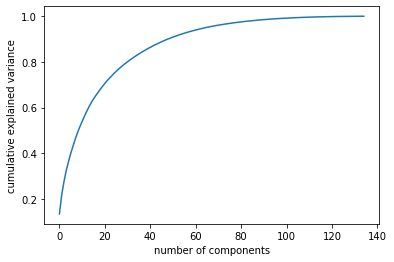

In [382]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [383]:
pca = PCA(n_components=components)
X_train3 = pca.fit_transform(X_train2)
X_test3 = pca.transform(X_test2)

param = {'C': [0.001,0.01,0.1,1, 10, 100,1000],
              'kernel': ['linear']}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_efdr = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_efdr.fit(X_train3, Y_train.values.ravel())

train_accuracy_efdr = grid_efdr.best_score_
grid_predict_efdr = grid_efdr.predict(X_test3)
test_accuracy_efdr = metrics.accuracy_score(Y_test,grid_predict_efdr)

print(grid_efdr.best_params_)
print("Train Accuracy: " + str(train_accuracy_efdr))
print("Test Accuracy: " + str(test_accuracy_efdr))
print(metrics.classification_report(Y_test, grid_predict_efdr))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Fitting 200 folds for each of 7 candidates, totalling 1400 fits
{'C': 1, 'kernel': 'linear'}
Train Accuracy: 0.8475000000000001
Test Accuracy: 0.7241379310344828
              precision    recall  f1-score   support

           0       0.61      0.85      0.71        13
           1       0.60      0.46      0.52        13
           2       0.85      0.79      0.81        14
           3       0.88      0.70      0.78        10
           4       0.78      0.88      0.82         8

    accuracy                           0.72        58
   macro avg       0.74      0.73      0.73        58
weighted avg       0.73      0.72      0.72        58



# Early-fusion with mode specific Dimensionality Reduction using PCA


In [391]:
pca1 = PCA()
pca2 = PCA()
pca3 = PCA()

print("midi")
X_trainm = pca1.fit_transform(train_vectorm)
X_testm = pca1.transform(test_vectorm)
print(X_trainm.shape,X_testm.shape)
print(type(X_trainm),type(X_testm))
print(pca1.n_components_)
componentsm = np.where(np.cumsum(pca1.explained_variance_ratio_) == max(np.cumsum(pca1.explained_variance_ratio_)))[0][0]
print(componentsm)

print("Lyrics")
X_trainl = pca2.fit_transform(train_vectorl)
X_testl = pca2.transform(test_vectorl)
print(X_trainl.shape,X_testl.shape)
print(type(X_trainl),type(X_testl))
print(pca2.n_components_)
componentsl = np.where(np.cumsum(pca2.explained_variance_ratio_) == max(np.cumsum(pca2.explained_variance_ratio_)))[0][0]
print(componentsl)

print("Audio")
X_traina = pca3.fit_transform(train_vectora)
X_testa = pca3.transform(test_vectora)
print(X_traina.shape,X_testa.shape)
print(type(X_traina),type(X_testa))
print(pca3.n_components_)
componentsa = np.where(np.cumsum(pca3.explained_variance_ratio_) == max(np.cumsum(pca3.explained_variance_ratio_)))[0][0]
print(componentsa)

midi
(135, 135) (58, 135)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
135
132
Lyrics
(135, 135) (58, 135)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
135
127
Audio
(135, 11) (58, 11)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
11
10


Text(0, 0.5, 'cumulative explained variance')

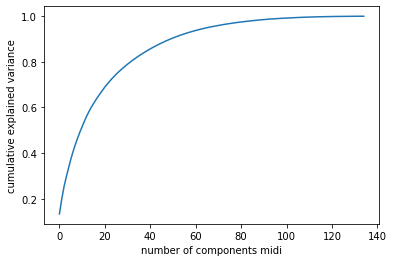

In [392]:
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components midi')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'cumulative explained variance')

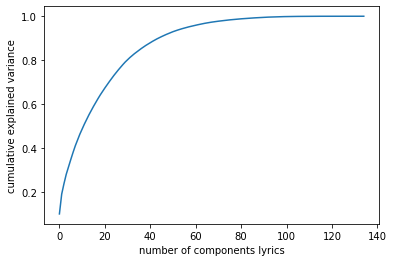

In [393]:
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components lyrics')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'cumulative explained variance')

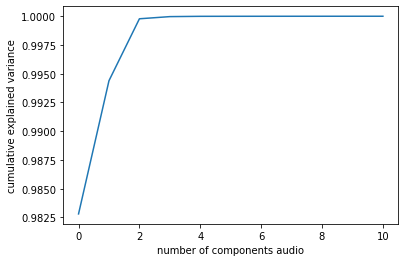

In [394]:
plt.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.xlabel('number of components audio')
plt.ylabel('cumulative explained variance')

In [395]:
pca1 = PCA(n_components=componentsm)
X_trainm = pca1.fit_transform(X_trainm)
X_testm = pca1.transform(X_testm)

pca2 = PCA(n_components=componentsl)
X_trainl = pca2.fit_transform(X_trainl)
X_testl = pca2.transform(X_testl)

pca3 = PCA(n_components=componentsa)
X_traina = pca3.fit_transform(X_traina)
X_testa = pca3.transform(X_testa)

In [396]:
X_trainm = pd.DataFrame(X_trainm)
X_testm = pd.DataFrame(X_testm)
X_trainl = pd.DataFrame(X_trainl)
X_testl = pd.DataFrame(X_testl)
X_traina = pd.DataFrame(X_traina)
X_testa = pd.DataFrame(X_testa)

X_trainm = X_trainm.reset_index(drop=True)
X_testm = X_testm.reset_index(drop=True)
X_trainl = X_trainl.reset_index(drop=True)
X_testl = X_testl.reset_index(drop=True)
X_traina = X_traina.reset_index(drop=True)
X_testa = X_testa.reset_index(drop=True)

X_train2 = pd.concat([X_trainm,X_traina,X_trainl], axis=1)
X_test2 = pd.concat([X_testm,X_testa,X_testl], axis=1)

print(X_train2.shape, X_test2.shape)

(135, 269) (58, 269)


In [397]:
%%time
param = {'C': [0.001,0.01,0.1,1, 10, 100,1000],
              'kernel': ['linear']}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)

grid_efmdr = GridSearchCV(svm.SVC(), param, verbose = 3, cv=cv, return_train_score=True, n_jobs=15)
grid_efmdr.fit(X_train2, Y_train.values.ravel())

train_accuracy_efmdr = grid_efmdr.best_score_
grid_predict_efmdr = grid_efmdr.predict(X_test2)
test_accuracy_efmdr = metrics.accuracy_score(Y_test,grid_predict_efmdr)

print(grid_efmdr.best_params_)
print("Train Accuracy: " + str(train_accuracy_efmdr))
print("Test Accuracy: " + str(test_accuracy_efmdr))
print(metrics.classification_report(Y_test, grid_predict_efmdr))

Fitting 200 folds for each of 7 candidates, totalling 1400 fits
{'C': 1, 'kernel': 'linear'}
Train Accuracy: 0.8428296703296704
Test Accuracy: 0.7241379310344828
              precision    recall  f1-score   support

           0       0.61      0.85      0.71        13
           1       0.60      0.46      0.52        13
           2       0.85      0.79      0.81        14
           3       0.88      0.70      0.78        10
           4       0.78      0.88      0.82         8

    accuracy                           0.72        58
   macro avg       0.74      0.73      0.73        58
weighted avg       0.73      0.72      0.72        58

Wall time: 1.78 s


# Graph Maker

In [405]:
def plot_bar_error(labels, accuracy, title):
    # plot the train and test errors of labels in a bar graph
    ax = plt.subplot(111)
    _X = np.arange(len(labels))
    colors = ['cornflowerblue','lightgreen']
    for i in range(2):
        ax.bar(_X - 0.25 + i/4.0, accuracy[i], width=0.25, align='edge', color=colors[i])
    plt.xticks(_X, labels)
    ax.set_ylabel('Accuracy')
    ax.legend(['train accuracy', 'test accuracy'])
    ax.set_title(title)

### Initial Midi Experiments

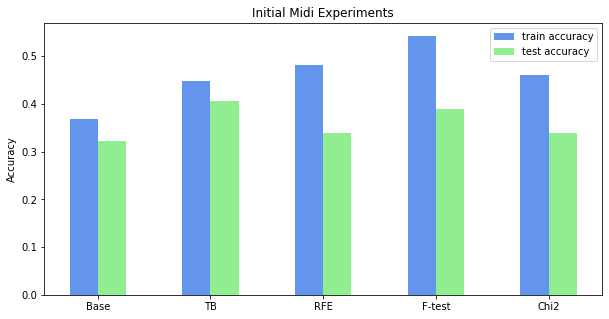

In [406]:
labels = ['Base','TB','RFE','F-test','Chi2']
train = [0.36777472527472527, 0.4484615384615384, 0.48115384615384615, 0.5425, 0.46005494505494504]
test = [0.3220338983050847, 0.4067796610169492, 0.3389830508474576, 0.3898305084745763, 0.3389830508474576]
accuracy = [train, test]
plt.figure(figsize=(10,5))
plot_bar_error(labels, accuracy, 'Initial Midi Experiments')
plt.savefig("Initial_midi.png")

### Initial Lyrics Experiments

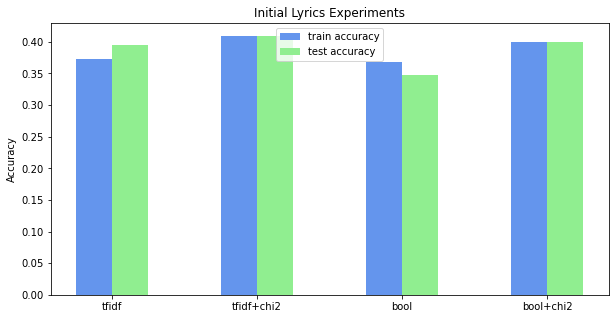

In [407]:
labels = ['tfidf','tfidf+chi2','bool','bool+chi2']
train = [0.3723707197763801, 0.4093046820405311, 0.3683350803633823, 0.3993588399720476]
test =  [0.39565217391304347, 0.4093046820405311, 0.34782608695652173, 0.3993588399720476]
accuracy = [train,test]
plt.figure(figsize=(10,5))
plot_bar_error(labels, accuracy, 'Initial Lyrics Experiments')
plt.savefig("Initial_lyrics.png")

### Initial Audio Experiments

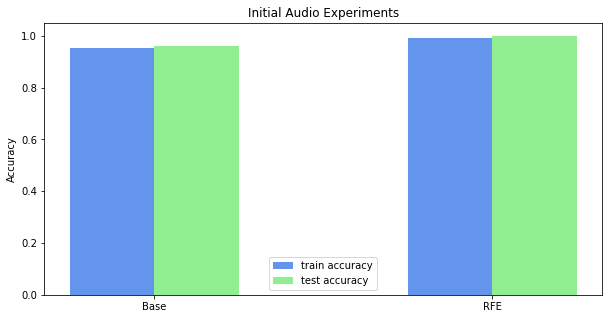

In [408]:
labels = ['Base', 'RFE']
train = [0.9540376984126985, 0.993358134920635]
test =  [0.959409594095941, 1.0]
accuracy = [train,test]
plt.figure(figsize=(10,5))
plot_bar_error(labels, accuracy, 'Initial Audio Experiments')
plt.savefig("Initial_audio.png")

### Baseline accuracy on reduced dataset

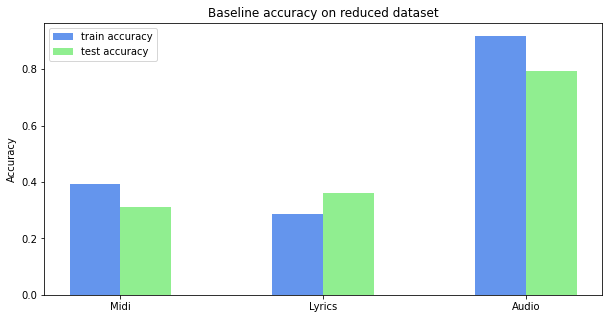

In [409]:
labels = ['Midi','Lyrics','Audio']
train = [0.3940384615384616, 0.28755494505494505, 0.9179120879120879]
test =  [0.3103448275862069, 0.3620689655172414, 0.7931034482758621]
accuracy = [train,test]
plt.figure(figsize=(10,5))
plot_bar_error(labels, accuracy, 'Baseline accuracy on reduced dataset')
plt.savefig("reduced_baseline.png")

### Accuracy with feature selection on reduced dataset

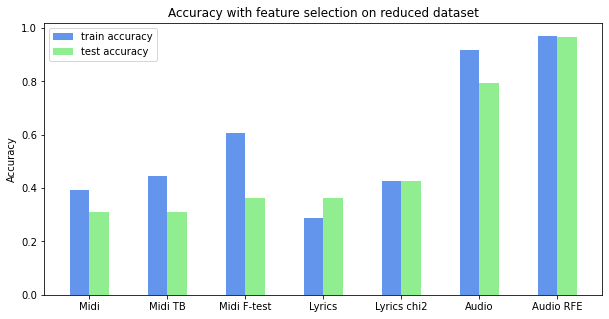

In [413]:
labels = ['Midi','Midi TB','Midi F-test','Lyrics','Lyrics chi2','Audio','Audio RFE']
train = [0.3940384615384616, 0.4452747252747253, 0.6072527472527472, 0.28755494505494505, 0.42793956043956044, 0.9179120879120879, 0.9702197802197804]
test =  [0.3103448275862069, 0.3103448275862069, 0.3620689655172414, 0.3620689655172414, 0.42793956043956044, 0.7931034482758621, 0.9655172413793104]
accuracy = [train,test]
plt.figure(figsize=(10,5))
plot_bar_error(labels, accuracy, 'Accuracy with feature selection on reduced dataset')
plt.savefig("reduced_FS.png")

### Comparing fusion methods

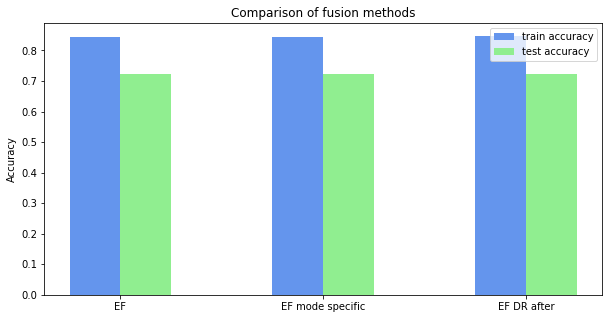

In [412]:
labels = ['EF', 'EF mode specific', 'EF DR after']
train = [0.8428571428571427, 0.8428296703296704, 0.8475000000000001]
test = [0.7241379310344828, 0.7241379310344828, 0.7241379310344828]
accuracy = [train,test]
plt.figure(figsize=(10,5))
plot_bar_error(labels, accuracy, 'Comparison of fusion methods')
plt.savefig("fusion_methods.png")